## Downloading Wico Dataset Uploaded On Kaggle

In [ ]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d manaspp/wico-graph
! unzip wico-graph

## Importing Necessary Libraries

In [ ]:
import random
import networkx as nx
import pandas as pd
import os
import statistics
import numpy as np

def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r

## Extracting 5G Conspiracy Graphs and Its Features As A DataFrame

We first extract all the graphs in this category. Then we calculate the different properties of the graph that we are using to train the machine learning models. These features are put together in a dataframe along with the feature called 'label' which indicates if the graph contains rumor or not.<br />
The graphs in this class have label `1` indicating the presence of rumor.

In [ ]:
temp = []

for i in range(1,413):
    temp.append(list_files(f'5G_Conspiracy_Graphs/{i}/'))

five_cons = []
for i in range(len(temp)):
  for j in range(len(temp[i])):
    if 'edges' in temp[i][j]:
      break
  f = pd.read_csv(temp[i][j],sep=" ",names=['source','target'])
  g = nx.from_pandas_edgelist(f,source='source', target='target',create_using = nx.DiGraph)
  features = []
  features.append(nx.number_of_nodes(g))
  features.append(nx.number_of_edges(g))
  try:
    features.append(np.mean(list(nx.degree_centrality(g).values())))
  except:
    features.append(np.nan)
  try:
    features.append(np.mean(list(nx.closeness_centrality(g).values())))
  except:
    features.append(np.nan)
  try:
    features.append(np.mean(list(nx.eigenvector_centrality(g).values())))
  except:
    features.append(np.nan)
  try:
    features.append(np.mean(list(nx.core_number(g).values())))
  except:
    features.append(np.nan)
  try:
    features.append(nx.average_clustering(g))
  except:
    features.append(np.nan)
  try:
    features.append(nx.transitivity(g))
  except:
    features.append(np.nan)
  try:
    features.append(np.mean(list(nx.square_clustering(g).values())))
  except:
    features.append(np.nan)
  try:
    features.append(nx.radius(g))
  except:
    features.append(np.nan)
  try:
    features.append(nx.diameter(g))
  except:
    features.append(np.nan)
  features.append(1)
  five_cons.append(features)

fivegc = pd.DataFrame(five_cons, columns = ["nodes","edges","degree_centrality","closeness_centrality","eigenvector_centrality","core_number","average_clustering","transitivity","square_clustering","radius","diameter","label"])

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
fivegc.head()

,nodes,edges,degree_centrality,closeness_centrality,eigenvector_centrality,core_number,average_clustering,transitivity,square_clustering,radius,diameter,label
0,34,42,0.074866,0.058376,0.062396,1.764706,0.030321,0.133333,0.020588,NaN,NaN,1
1,12,20,0.303030,0.220111,0.161576,2.166667,0.356200,0.777778,0.333333,NaN,NaN,1
2,93,3094,0.723235,0.594776,0.089008,44.892473,0.719852,0.669482,0.514703,NaN,NaN,1
3,26,118,0.363077,0.374765,0.149954,5.423077,0.461625,0.396896,0.151054,NaN,NaN,1
4,55,63,0.042424,0.021762,0.037730,1.345455,0.039209,0.214286,0.018182,NaN,NaN,1



## Extracting Other Conspiracy Graphs

The same operations performed above are done to create a dataframe for this set of conspiracy graphs. Each row is given the label as `1`.

In [ ]:
temp = []

for i in range(1,598):
    temp.append(list_files(f'Other_Graphs/{i}/'))

other_cons = []
for i in range(len(temp)):
  for j in range(len(temp[i])):
    if 'edges' in temp[i][j]:
      break
  f = pd.read_csv(temp[i][j],sep=" ",names=['source','target'])
  g = nx.from_pandas_edgelist(f,source='source', target='target',create_using = nx.DiGraph)
  features = []
  features.append(nx.number_of_nodes(g))
  features.append(nx.number_of_edges(g))
  try:
    features.append(np.mean(list(nx.degree_centrality(g).values())))
  except:
    features.append(np.nan)
  try:
    features.append(np.mean(list(nx.closeness_centrality(g).values())))
  except:
    features.append(np.nan)
  try:
    features.append(np.mean(list(nx.eigenvector_centrality(g).values())))
  except:
    features.append(np.nan)
  try:
    features.append(np.mean(list(nx.core_number(g).values())))
  except:
    features.append(np.nan)
  try:
    features.append(nx.average_clustering(g))
  except:
    features.append(np.nan)
  try:
    features.append(nx.transitivity(g))
  except:
    features.append(np.nan)
  try:
    features.append(np.mean(list(nx.square_clustering(g).values())))
  except:
    features.append(np.nan)
  try:
    features.append(nx.radius(g))
  except:
    features.append(np.nan)
  try:
    features.append(nx.diameter(g))
  except:
    features.append(np.nan)
  features.append(1)
  other_cons.append(features)

othergc = pd.DataFrame(other_cons, columns = ["nodes","edges","degree_centrality","closeness_centrality","eigenvector_centrality","core_number","average_clustering","transitivity","square_clustering","radius","diameter","label"])

In [ ]:
othergc.head()

,nodes,edges,degree_centrality,closeness_centrality,eigenvector_centrality,core_number,average_clustering,transitivity,square_clustering,radius,diameter,label
0,6,10,0.666667,0.629630,0.381374,2.000000,0.000000,0.000000,0.000000,1.0,2.0,1
1,33,116,0.219697,0.416511,0.137674,4.090909,0.401854,0.195796,0.136842,NaN,NaN,1
2,97,484,0.103952,0.382327,0.071499,5.639175,0.404945,0.161834,0.086154,NaN,NaN,1
3,7,16,0.761905,0.527211,0.311391,3.285714,0.496429,0.500000,0.904762,NaN,NaN,1
4,34,45,0.080214,0.049392,0.067689,1.500000,0.089684,0.250000,0.186275,NaN,NaN,1


## Extracting Non-Conspiracy Graphs

The graphs in this class are given a label of `0` indicating the absence of rumor.

In [ ]:
  temp = []

for i in range(1,2502):
    temp.append(list_files(f'Non_Conspiracy_Graphs/{i}/'))

non_cons = []
for i in range(len(temp)):
  for j in range(len(temp[i])):
    if 'edges' in temp[i][j]:
      break
  f = pd.read_csv(temp[i][j],sep=" ",names=['source','target'])
  g = nx.from_pandas_edgelist(f,source='source', target='target',create_using = nx.DiGraph)
  features = []
  features.append(nx.number_of_nodes(g))
  features.append(nx.number_of_edges(g))
  try:
    features.append(np.mean(list(nx.degree_centrality(g).values())))
  except:
    features.append(np.nan)
  try:
    features.append(np.mean(list(nx.closeness_centrality(g).values())))
  except:
    features.append(np.nan)
  try:
    features.append(np.mean(list(nx.eigenvector_centrality(g).values())))
  except:
    features.append(np.nan)
  try:
    features.append(np.mean(list(nx.core_number(g).values())))
  except:
    features.append(np.nan)
  try:
    features.append(nx.average_clustering(g))
  except:
    features.append(np.nan)
  try:
    features.append(nx.transitivity(g))
  except:
    features.append(np.nan)
  try:
    features.append(np.mean(list(nx.square_clustering(g).values())))
  except:
    features.append(np.nan)
  try:
    features.append(nx.radius(g))
  except:
    features.append(np.nan)
  try:
    features.append(nx.diameter(g))
  except:
    features.append(np.nan)
  features.append(0)
  non_cons.append(features)

nongc = pd.DataFrame(non_cons, columns = ["nodes","edges","degree_centrality","closeness_centrality","eigenvector_centrality","core_number","average_clustering","transitivity","square_clustering","radius","diameter","label"])

In [ ]:
nongc.head()

,nodes,edges,degree_centrality,closeness_centrality,eigenvector_centrality,core_number,average_clustering,transitivity,square_clustering,radius,diameter,label
0,51,127,0.099608,0.198745,0.071539,2.843137,0.306668,0.297980,0.115920,NaN,NaN,0
1,72,202,0.079030,0.211209,0.060700,3.166667,0.328255,0.330996,0.106258,NaN,NaN,0
2,9,8,0.222222,0.111111,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0
3,11,12,0.218182,0.115152,0.155196,2.000000,0.000000,0.000000,0.000000,NaN,NaN,0
4,58,96,0.058076,0.209348,0.074134,1.931034,0.104574,0.061983,0.008611,NaN,NaN,0


# 5G Conspiracy VS Non Conspiracy

- First we evaluate the models on a combined dataset of the 5G conspiracy and Non conspiracy. We use pandas concat function to merge the two datasets.
- The combined dataset will have a class imbalance, as the number of entries with class 1 is 413 compared to 2502 rows in the class 0. Hence, we will have to use models robust to such a heavy class imbalance and also adjust model to deal with the issue.
- We fill the missing values with mean of the values in the dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

five_v_non = pd.concat([fivegc,nongc])

X = five_v_non[["nodes","edges","degree_centrality","closeness_centrality","eigenvector_centrality","core_number","average_clustering","transitivity","square_clustering","radius","diameter"]]
Y = five_v_non[["label"]]

X['degree_centrality'].fillna(value=int(X['degree_centrality'].mean()), inplace=True)
X['closeness_centrality'].fillna(value=int(X['closeness_centrality'].mean()), inplace=True)
X['eigenvector_centrality'].fillna(value=int(X['eigenvector_centrality'].mean()), inplace=True)
X['core_number'].fillna(value=int(X['core_number'].mean()), inplace=True)
X['average_clustering'].fillna(value=int(X['average_clustering'].mean()), inplace=True)
X['transitivity'].fillna(value=int(X['transitivity'].mean()), inplace=True)
X['square_clustering'].fillna(value=int(X['square_clustering'].mean()), inplace=True)
X['radius'].fillna(value=int(X['radius'].mean()), inplace=True)
X['diameter'].fillna(value=int(X['diameter'].mean()), inplace=True)

X = preprocessing.scale(X) 

## Weighted Support Vector Classification.

- The Support Vector Machine algorithm is effective for balanced classification, although it does not perform well on imbalanced datasets.
- The SVM algorithm finds a hyperplane decision boundary that best splits the examples into two classes. The split is made soft through the use of a margin that allows some points to be misclassified. By default, this margin favors the majority class on imbalanced datasets, although it can be updated to take the importance of each class into account and dramatically improve the performance of the algorithm on datasets with skewed class distributions.


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

weights = ({0:1.0, 1:1.0},{0:2.0, 1:1.0},{0:5.0, 1:1.0})
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'),'C':(0.5,1,1.5,2,2.5),'class_weight':weights}
svc = SVC(class_weight=weights)
clf = GridSearchCV(svc, parameters,scoring = 'precision')
clf.fit(X,np.array(Y).ravel())

[]

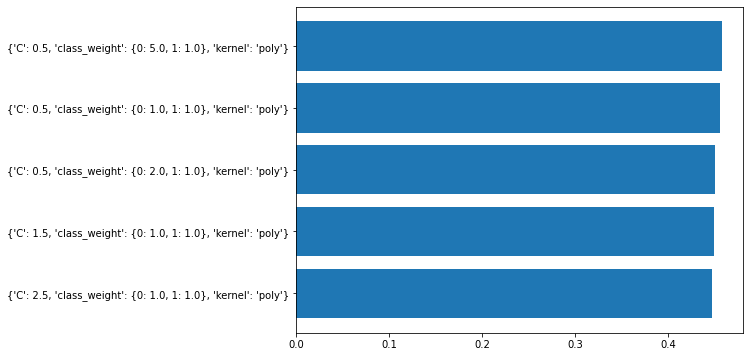

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (8,6))
temp =[]
for i,j in zip(clf.cv_results_['params'],clf.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax.barh(y_pos,x)
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis()
plt.plot()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':(5,10,20,40,60,100),'criterion':('gini', 'entropy', 'log_loss'),'max_features':('sqrt', 'log2', 'None')}
rfc = RandomForestClassifier()

clf = GridSearchCV(rfc, parameters, scoring = 'precision')
clf.fit(X,np.array(Y).ravel())

[]

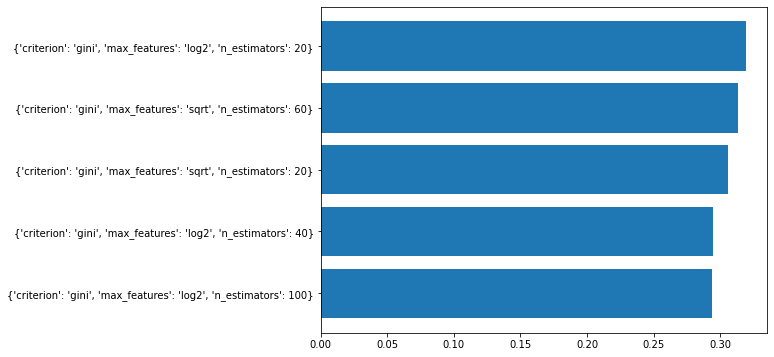

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (8,6))
temp =[]
for i,j in zip(clf.cv_results_['params'],clf.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax.barh(y_pos,x)
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis()
plt.plot()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

parameters = {'penalty':('l1', 'l2', 'elasticnet'),'C':(0.1,0.2,0.5,1,1.5,2)}
lr = LogisticRegression(solver='saga',max_iter=5000)

clf = GridSearchCV(lr, parameters,scoring = 'precision')
clf.fit(X,np.array(Y).ravel())

[]

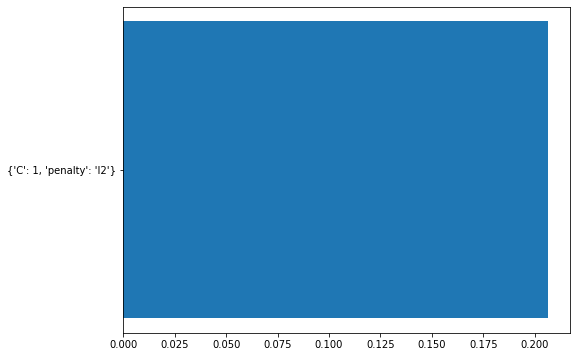

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (8,6))
temp =[]
for i,j in zip(clf.cv_results_['params'],clf.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax.barh(y_pos,x)
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis()
plt.plot()

## AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

parameters = {'n_estimators':(25,50,100,150),'learning_rate':(0.1,0.5,1,1.5)}
abc = AdaBoostClassifier()

clf = GridSearchCV(abc, parameters,scoring = 'precision')
clf.fit(X,np.array(Y).ravel())

[]

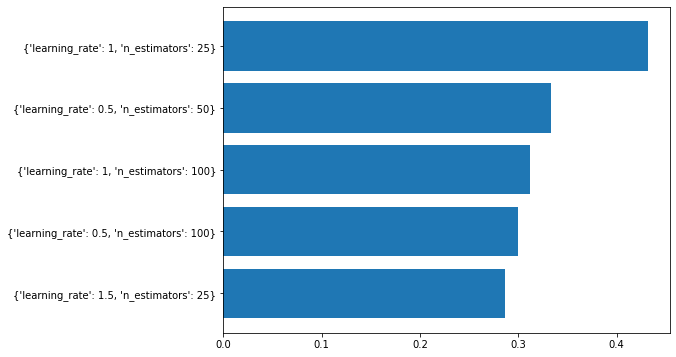

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (8,6))
temp =[]
for i,j in zip(clf.cv_results_['params'],clf.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax.barh(y_pos,x)
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis()
plt.plot()

### Histogram Based Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()

scores =  cross_val_score(hgb,X,np.array(Y).ravel(),cv = 5,scoring = 'precision')
scores,scores.mean()

(array([0.28571429, 0.22222222, 0.27777778, 0.23529412, 0.3125    ]),
 0.2667016806722689)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()

scores =  cross_val_score(hgb,X_transformed_p,np.array(Y).ravel(),cv = 5,scoring = 'precision')
scores,scores.mean()

(array([0.4       , 0.47368421, 0.25      , 0.22222222, 0.32      ]),
 0.33318128654970763)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()

scores =  cross_val_score(hgb,X_transformed_l,np.array(Y).ravel(),cv = 5,scoring = 'precision')
scores,scores.mean()

(array([0.34285714, 0.26086957, 0.34482759, 0.14285714, 0.35294118]),
 0.28887052272183233)

## Kernel Principal Component Analysis Dimension Reduction

We explore the various kernels that can be used in the dimension reduction, i.e , `linear, rbf and poly kernels`. We choose the kernel giving us the best precision score in our cross validation.

In [ ]:
from sklearn.decomposition import KernelPCA
transformer_l = KernelPCA(n_components=None, kernel='linear')
X_transformed_l = transformer_l.fit_transform(X)
X_transformed_l = preprocessing.scale(X_transformed_l) 

transformer_r = KernelPCA(n_components=None, kernel='rbf')
X_transformed_r = transformer_r.fit_transform(X)
X_transformed_r = preprocessing.scale(X_transformed_r) 

transformer_p = KernelPCA(n_components=None, kernel='poly')
X_transformed_p = transformer_p.fit_transform(X)
X_transformed_p = preprocessing.scale(X_transformed_p) 

In [ ]:
print(f"Variance captured by 7 eigen values in linear kernel: {np.sum(transformer_l.eigenvalues_[:7])/np.sum(transformer_l.eigenvalues_)}")
print(f"Variance captured by 50 eigen values in rbf kernel: {np.sum(transformer_r.eigenvalues_[:50])/np.sum(transformer_r.eigenvalues_)}")
print(f"Variance captured by 7 eigen values in poly kernel: {np.sum(transformer_p.eigenvalues_[:7])/np.sum(transformer_p.eigenvalues_)}")

Variance captured by 7 eigen values in linear kernel: 0.9712394243309551
Variance captured by 50 eigen values in rbf kernel: 0.9450133781838482
Variance captured by 7 eigen values in poly kernel: 0.9492795412712789


Since the top 10 eigen values capture significant amount of the variance in linear and poly kernels we will take the top 10 eigen values for PCA transformation. But for the rbf kernel, we see that it isn't able to compress the data properly even with 50 eigen vectors and hence we will not use the rbf kernel in our case.

In [ ]:
from sklearn.decomposition import KernelPCA
transformer_l = KernelPCA(n_components=7, kernel='linear')
X_transformed_l = transformer_l.fit_transform(X)
X_transformed_l = preprocessing.scale(X_transformed_l) 

transformer_p = KernelPCA(n_components=7, kernel='poly')
X_transformed_p = transformer_p.fit_transform(X)
X_transformed_p = preprocessing.scale(X_transformed_p) 

## Weighted SVM on PCA Tranformed Data

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

weights = ({0:1.0, 1:1.0},{0:2.0, 1:1.0},{0:5.0, 1:1.0})
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'),'C':(0.5,1,1.5,2,2.5),'class_weight':weights}
svc = SVC(class_weight=weights)
clf1 = GridSearchCV(svc, parameters,scoring = 'precision')
clf1.fit(X_transformed_l,np.array(Y).ravel())

clf2 = GridSearchCV(svc, parameters,scoring = 'precision')
clf2.fit(X_transformed_p,np.array(Y).ravel())

[]

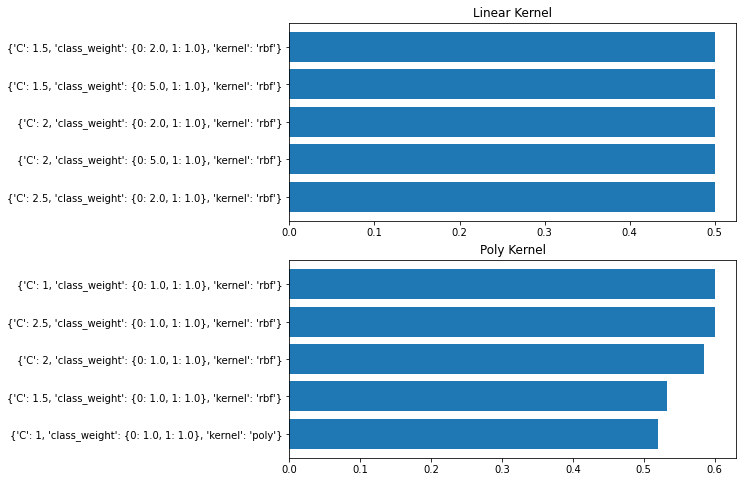

In [ ]:
fig,ax = plt.subplots(2,1,figsize = (8,8))
temp =[]
for i,j in zip(clf1.cv_results_['params'],clf1.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax[0].barh(y_pos,x)
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(y)
ax[0].set_title("Linear Kernel")
ax[0].invert_yaxis()

temp =[]
for i,j in zip(clf2.cv_results_['params'],clf2.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax[1].barh(y_pos,x)
ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(y)
ax[1].invert_yaxis()
ax[1].set_title("Poly Kernel")
plt.plot()

## Random Forest on PCA Transformed Data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':(5,10,20,40,60,100),'criterion':('gini', 'entropy', 'log_loss'),'max_features':('sqrt', 'log2', 'None')}
rfc = RandomForestClassifier()

clf1 = GridSearchCV(rfc, parameters, scoring = 'precision')
clf1.fit(X_transformed_p,np.array(Y).ravel())

clf2 = GridSearchCV(rfc, parameters, scoring = 'precision')
clf2.fit(X_transformed_l,np.array(Y).ravel())

[]

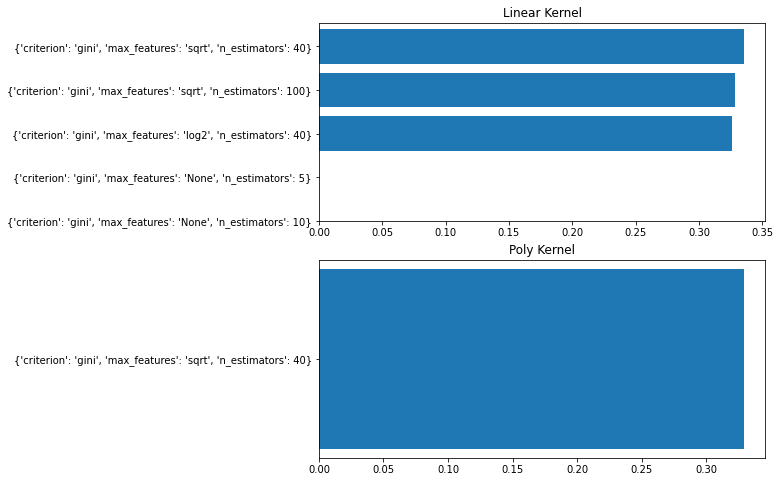

In [ ]:
fig,ax = plt.subplots(2,1,figsize = (8,8))
temp =[]
for i,j in zip(clf1.cv_results_['params'],clf1.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax[0].barh(y_pos,x)
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(y)
ax[0].set_title("Linear Kernel")
ax[0].invert_yaxis()

temp =[]
for i,j in zip(clf2.cv_results_['params'],clf2.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax[1].barh(y_pos,x)
ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(y)
ax[1].invert_yaxis()
ax[1].set_title("Poly Kernel")
plt.plot()

## Logistic Regression on PCA Transformed Data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

parameters = {'penalty':('l1', 'l2', 'elasticnet'),'C':(0.1,0.2,0.5,1,1.5,2)}
lr = LogisticRegression(solver='saga',max_iter=5000)

clf1 = GridSearchCV(lr, parameters,scoring = 'precision')
clf1.fit(X_transformed_l,np.array(Y).ravel())

clf2 = GridSearchCV(lr, parameters,scoring = 'precision')
clf2.fit(X_transformed_p,np.array(Y).ravel())

[]

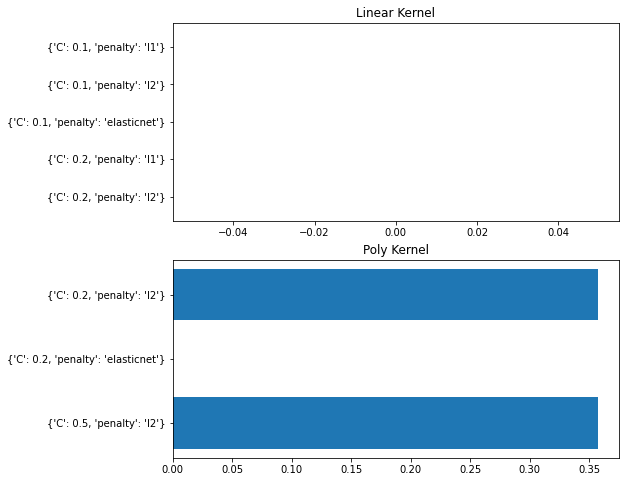

In [ ]:
fig,ax = plt.subplots(2,1,figsize = (8,8))
temp =[]
for i,j in zip(clf1.cv_results_['params'],clf1.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax[0].barh(y_pos,x)
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(y)
ax[0].set_title("Linear Kernel")
ax[0].invert_yaxis()

temp =[]
for i,j in zip(clf2.cv_results_['params'],clf2.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax[1].barh(y_pos,x)
ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(y)
ax[1].invert_yaxis()
ax[1].set_title("Poly Kernel")
plt.plot()

## AdaBoost Classifier on PCA Transformed Data

In [ ]:
parameters = {'n_estimators':(25,50,100,150),'learning_rate':(0.1,0.5,1,1.5)}
abc = AdaBoostClassifier()

clf1 = GridSearchCV(abc, parameters,scoring = 'precision')
clf1.fit(X_transformed_l,np.array(Y).ravel())

clf1 = GridSearchCV(abc, parameters,scoring = 'precision')
clf1.fit(X_transformed_p,np.array(Y).ravel())

[]

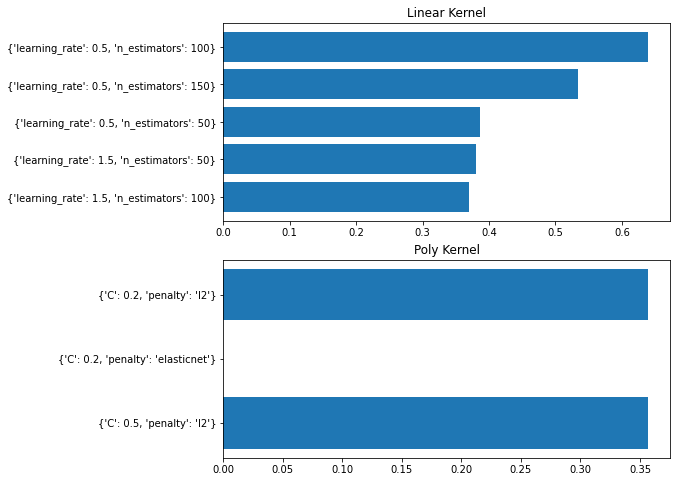

In [ ]:
fig,ax = plt.subplots(2,1,figsize = (8,8))
temp =[]
for i,j in zip(clf1.cv_results_['params'],clf1.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax[0].barh(y_pos,x)
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(y)
ax[0].set_title("Linear Kernel")
ax[0].invert_yaxis()

temp =[]
for i,j in zip(clf2.cv_results_['params'],clf2.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax[1].barh(y_pos,x)
ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(y)
ax[1].invert_yaxis()
ax[1].set_title("Poly Kernel")
plt.plot()

---
## Other Conspiracy vs Non Conspiracy
---

In [ ]:
from sklearn.model_selection import train_test_split

oth_v_non = pd.concat([othergc,nongc])

X = oth_v_non[["nodes","edges","degree_centrality","closeness_centrality","eigenvector_centrality","core_number","average_clustering","transitivity","square_clustering","radius","diameter"]]
Y = oth_v_non[["label"]]

X['degree_centrality'].fillna(value=int(X['degree_centrality'].mean()), inplace=True)
X['closeness_centrality'].fillna(value=int(X['closeness_centrality'].mean()), inplace=True)
X['eigenvector_centrality'].fillna(value=int(X['eigenvector_centrality'].mean()), inplace=True)
X['core_number'].fillna(value=int(X['core_number'].mean()), inplace=True)
X['average_clustering'].fillna(value=int(X['average_clustering'].mean()), inplace=True)
X['transitivity'].fillna(value=int(X['transitivity'].mean()), inplace=True)
X['square_clustering'].fillna(value=int(X['square_clustering'].mean()), inplace=True)
X['radius'].fillna(value=int(X['radius'].mean()), inplace=True)
X['diameter'].fillna(value=int(X['diameter'].mean()), inplace=True)

X = preprocessing.scale(X) 

## Weighted Support Vector Classification

In [ ]:
weights = ({0:1.0, 1:1.0},{0:2.0, 1:1.0},{0:5.0, 1:1.0})
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'),'C':(0.5,1,1.5,2,2.5),'class_weight':weights}
svc = SVC()
clf = GridSearchCV(svc, parameters,scoring = 'precision')
clf.fit(X,np.array(Y).ravel())

[]

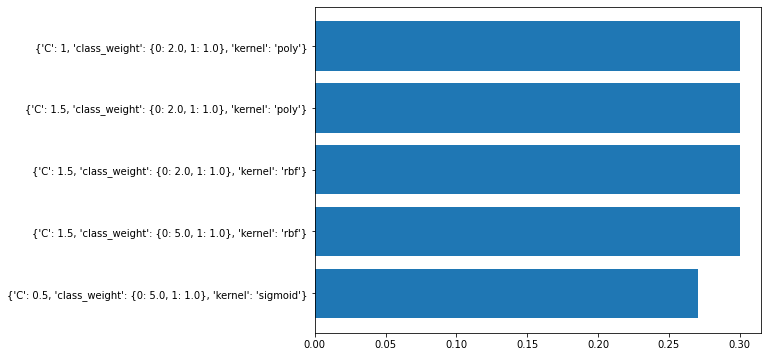

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (8,6))
temp =[]
for i,j in zip(clf.cv_results_['params'],clf.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax.barh(y_pos,x)
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis()
plt.plot()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':(5,10,20,40,60,100),'criterion':('gini', 'entropy', 'log_loss'),'max_features':('sqrt', 'log2', 'None')}
rfc = RandomForestClassifier()

clf = GridSearchCV(rfc, parameters,scoring = 'precision')
clf.fit(X,np.array(Y).ravel())

[]

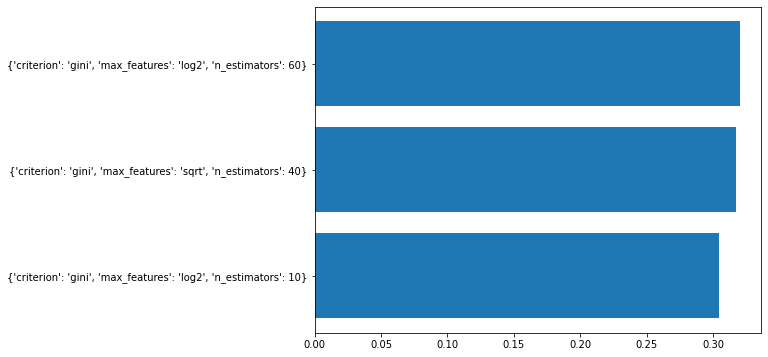

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (8,6))
temp =[]
for i,j in zip(clf.cv_results_['params'],clf.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax.barh(y_pos,x)
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis()
plt.plot()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

parameters = {'penalty':('l1', 'l2', 'elasticnet'),'C':(0.1,0.2,0.5,1,1.5,2)}
lr = LogisticRegression(solver='saga',max_iter=5000)

clf = GridSearchCV(lr, parameters,scoring = 'precision')
clf.fit(X,np.array(Y).ravel())

[]

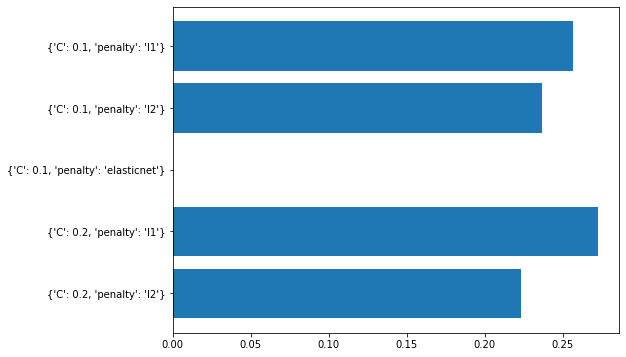

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (8,6))
temp =[]
for i,j in zip(clf.cv_results_['params'],clf.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax.barh(y_pos,x)
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis()
plt.plot()

## AdaBoost Classifier

In [ ]:

from sklearn.ensemble import AdaBoostClassifier

parameters = {'n_estimators':(25,50,100,150),'learning_rate':(0.1,0.5,1,1.5)}
abc = AdaBoostClassifier()

clf = GridSearchCV(abc, parameters,scoring = 'precision')
clf.fit(X,np.array(Y).ravel())

[]

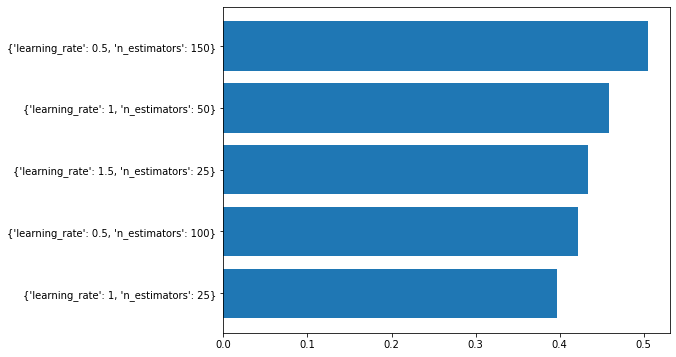

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (8,6))
temp =[]
for i,j in zip(clf.cv_results_['params'],clf.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax.barh(y_pos,x)
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis()
plt.plot()

## Histogram Based Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()

scores =  cross_val_score(hgb,X,np.array(Y).ravel(),cv = 5,scoring = 'precision')
scores,scores.mean()

(array([0.27272727, 0.34090909, 0.3125    , 0.16666667, 0.31111111]),
 0.2807828282828283)

## Kernel Principal Component Analysis

In [ ]:
from sklearn.decomposition import KernelPCA
transformer_l = KernelPCA(n_components=None, kernel='linear')
X_transformed_l = transformer_l.fit_transform(X)
X_transformed_l = preprocessing.scale(X_transformed_l) 

transformer_r = KernelPCA(n_components=None, kernel='rbf')
X_transformed_r = transformer_r.fit_transform(X)
X_transformed_r = preprocessing.scale(X_transformed_r) 

transformer_p = KernelPCA(n_components=None, kernel='poly')
X_transformed_p = transformer_p.fit_transform(X)
X_transformed_p = preprocessing.scale(X_transformed_p) 

In [ ]:
print(f"Variance captured by 10 eigen values in linear kernel: {np.sum(transformer_l.eigenvalues_[:7])/np.sum(transformer_l.eigenvalues_)}")
print(f"Variance captured by 50 eigen values in rbf kernel: {np.sum(transformer_r.eigenvalues_[:50])/np.sum(transformer_r.eigenvalues_)}")
print(f"Variance captured by 10 eigen values in poly kernel: {np.sum(transformer_p.eigenvalues_[:7])/np.sum(transformer_p.eigenvalues_)}")

Variance captured by 10 eigen values in linear kernel: 0.9702491602651643
Variance captured by 50 eigen values in rbf kernel: 0.9426373107292502
Variance captured by 10 eigen values in poly kernel: 0.9501039694858892


In [ ]:
from sklearn.decomposition import KernelPCA
transformer_l = KernelPCA(n_components=7, kernel='linear')
X_transformed_l = transformer_l.fit_transform(X)
X_transformed_l = preprocessing.scale(X_transformed_l) 

transformer_p = KernelPCA(n_components=7, kernel='poly')
X_transformed_p = transformer_p.fit_transform(X)
X_transformed_p = preprocessing.scale(X_transformed_p) 

## Weighted SVM on PCA Tranformed Data

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

weights = ({0:1.0, 1:1.0},{0:2.0, 1:1.0},{0:5.0, 1:1.0})
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'),'C':(0.5,1,1.5,2,2.5),'class_weight':weights}
svc = SVC(class_weight=weights)
clf1 = GridSearchCV(svc, parameters,scoring = 'precision')
clf1.fit(X_transformed_l,np.array(Y).ravel())

clf2 = GridSearchCV(svc, parameters,scoring = 'precision')
clf2.fit(X_transformed_p,np.array(Y).ravel())

[]

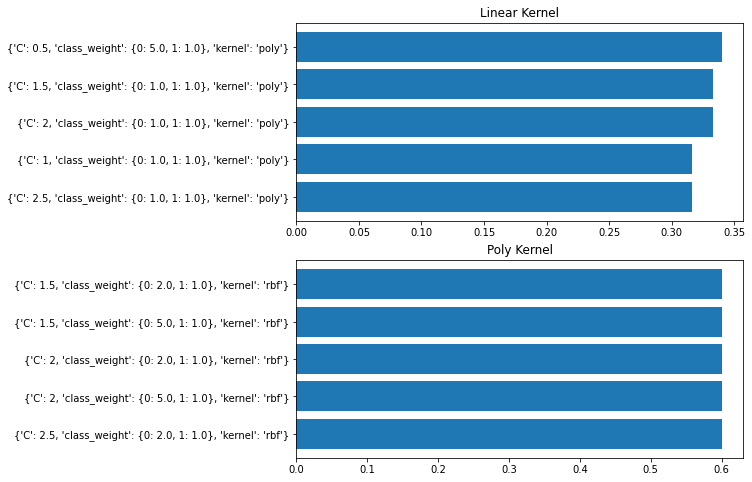

In [ ]:
fig,ax = plt.subplots(2,1,figsize = (8,8))
temp =[]
for i,j in zip(clf1.cv_results_['params'],clf1.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax[0].barh(y_pos,x)
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(y)
ax[0].set_title("Linear Kernel")
ax[0].invert_yaxis()

temp =[]
for i,j in zip(clf2.cv_results_['params'],clf2.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax[1].barh(y_pos,x)
ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(y)
ax[1].invert_yaxis()
ax[1].set_title("Poly Kernel")
plt.plot()

## Random Forest on PCA Transformed Data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':(5,10,20,40,60,100),'criterion':('gini', 'entropy', 'log_loss'),'max_features':('sqrt', 'log2', 'None')}
rfc = RandomForestClassifier()

clf1 = GridSearchCV(rfc, parameters, scoring = 'precision')
clf1.fit(X_transformed_p,np.array(Y).ravel())

clf2 = GridSearchCV(rfc, parameters, scoring = 'precision')
clf2.fit(X_transformed_l,np.array(Y).ravel())

[]

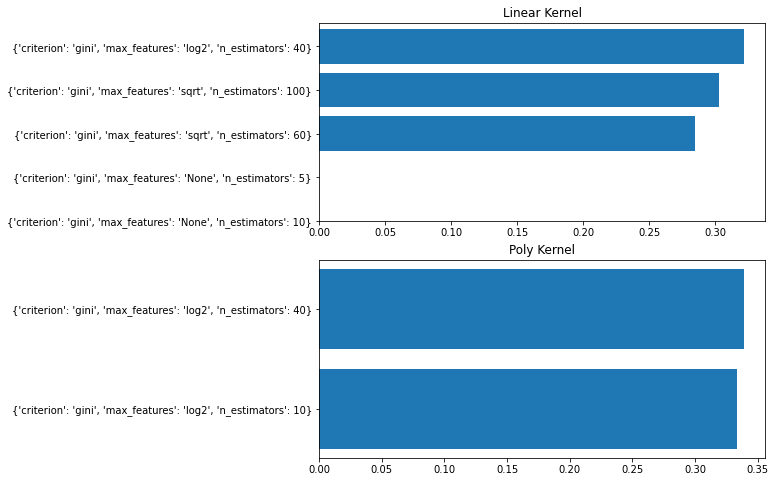

In [ ]:
fig,ax = plt.subplots(2,1,figsize = (8,8))
temp =[]
for i,j in zip(clf1.cv_results_['params'],clf1.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax[0].barh(y_pos,x)
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(y)
ax[0].set_title("Linear Kernel")
ax[0].invert_yaxis()

temp =[]
for i,j in zip(clf2.cv_results_['params'],clf2.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax[1].barh(y_pos,x)
ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(y)
ax[1].invert_yaxis()
ax[1].set_title("Poly Kernel")
plt.plot()

## Logistic Regression on PCA Transformed Data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

parameters = {'penalty':('l1', 'l2', 'elasticnet'),'C':(0.1,0.2,0.5,1,1.5,2)}
lr = LogisticRegression(solver='saga',max_iter=5000)

clf1 = GridSearchCV(lr, parameters,scoring = 'precision')
clf1.fit(X_transformed_l,np.array(Y).ravel())

clf2 = GridSearchCV(lr, parameters,scoring = 'precision')
clf2.fit(X_transformed_p,np.array(Y).ravel())

[]

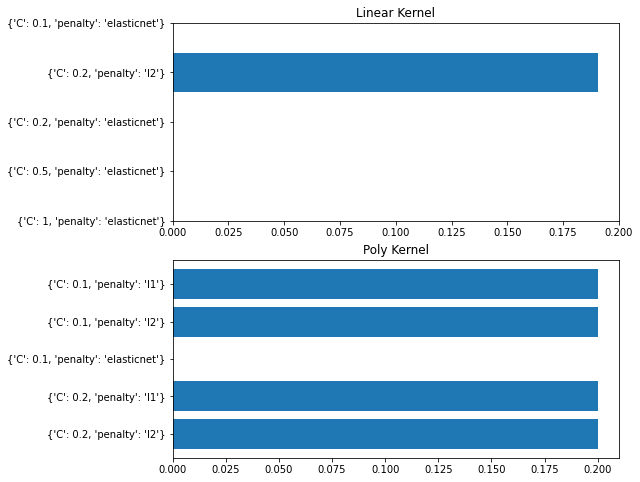

In [ ]:
fig,ax = plt.subplots(2,1,figsize = (8,8))
temp =[]
for i,j in zip(clf1.cv_results_['params'],clf1.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax[0].barh(y_pos,x)
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(y)
ax[0].set_title("Linear Kernel")
ax[0].invert_yaxis()

temp =[]
for i,j in zip(clf2.cv_results_['params'],clf2.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax[1].barh(y_pos,x)
ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(y)
ax[1].invert_yaxis()
ax[1].set_title("Poly Kernel")
plt.plot()

## AdaBoost Classifier on PCA Transformed Data

In [ ]:
parameters = {'n_estimators':(25,50,100,150),'learning_rate':(0.1,0.5,1,1.5)}
abc = AdaBoostClassifier()

clf1 = GridSearchCV(abc, parameters,scoring = 'precision')
clf1.fit(X_transformed_l,np.array(Y).ravel())

clf1 = GridSearchCV(abc, parameters,scoring = 'precision')
clf1.fit(X_transformed_p,np.array(Y).ravel())

[]

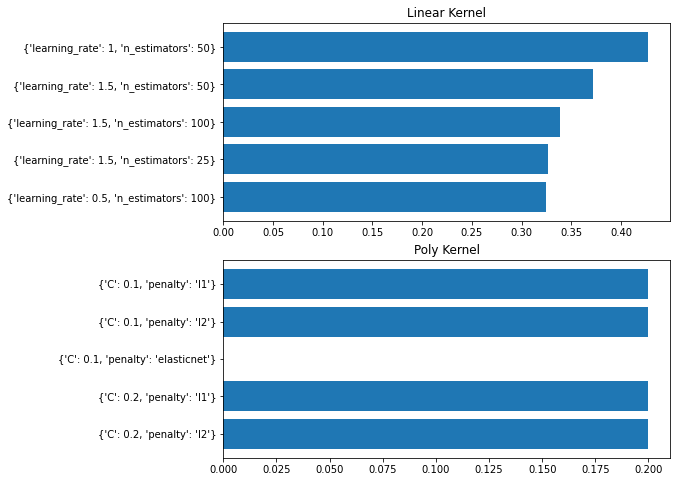

In [ ]:
fig,ax = plt.subplots(2,1,figsize = (8,8))
temp =[]
for i,j in zip(clf1.cv_results_['params'],clf1.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax[0].barh(y_pos,x)
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(y)
ax[0].set_title("Linear Kernel")
ax[0].invert_yaxis()

temp =[]
for i,j in zip(clf2.cv_results_['params'],clf2.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax[1].barh(y_pos,x)
ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(y)
ax[1].invert_yaxis()
ax[1].set_title("Poly Kernel")
plt.plot()

---
## Conspiracy vs Non-Conspiracy
---

In [ ]:
from sklearn.model_selection import train_test_split

cons_v_non = pd.concat([fivegc,othergc,nongc])

X = cons_v_non[["nodes","edges","degree_centrality","closeness_centrality","eigenvector_centrality","core_number","average_clustering","transitivity","square_clustering","radius","diameter"]]
Y = cons_v_non[["label"]]

X['degree_centrality'].fillna(value=int(X['degree_centrality'].mean()), inplace=True)
X['closeness_centrality'].fillna(value=int(X['closeness_centrality'].mean()), inplace=True)
X['eigenvector_centrality'].fillna(value=int(X['eigenvector_centrality'].mean()), inplace=True)
X['core_number'].fillna(value=int(X['core_number'].mean()), inplace=True)
X['average_clustering'].fillna(value=int(X['average_clustering'].mean()), inplace=True)
X['transitivity'].fillna(value=int(X['transitivity'].mean()), inplace=True)
X['square_clustering'].fillna(value=int(X['square_clustering'].mean()), inplace=True)
X['radius'].fillna(value=int(X['radius'].mean()), inplace=True)
X['diameter'].fillna(value=int(X['diameter'].mean()), inplace=True)

X = preprocessing.scale(X) 

## Kernel Principal Component Analysis

In [ ]:
from sklearn.decomposition import KernelPCA
transformer_l = KernelPCA(n_components=None, kernel='linear')
X_transformed_l = transformer_l.fit_transform(X)
X_transformed_l = preprocessing.scale(X_transformed_l) 

transformer_r = KernelPCA(n_components=None, kernel='rbf')
X_transformed_r = transformer_r.fit_transform(X)
X_transformed_r = preprocessing.scale(X_transformed_r) 

transformer_p = KernelPCA(n_components=None, kernel='poly')
X_transformed_p = transformer_p.fit_transform(X)
X_transformed_p = preprocessing.scale(X_transformed_p) 

In [ ]:
print(f"Variance captured by 10 eigen values in linear kernel: {np.sum(transformer_l.eigenvalues_[:7])/np.sum(transformer_l.eigenvalues_)}")
print(f"Variance captured by 50 eigen values in rbf kernel: {np.sum(transformer_r.eigenvalues_[:50])/np.sum(transformer_r.eigenvalues_)}")
print(f"Variance captured by 10 eigen values in poly kernel: {np.sum(transformer_p.eigenvalues_[:7])/np.sum(transformer_p.eigenvalues_)}")

Variance captured by 10 eigen values in linear kernel: 0.9713782323663722
Variance captured by 50 eigen values in rbf kernel: 0.9424392369020049
Variance captured by 10 eigen values in poly kernel: 0.9432912372060672


In [ ]:
from sklearn.decomposition import KernelPCA
transformer_l = KernelPCA(n_components=7, kernel='linear')
X_transformed_l = transformer_l.fit_transform(X)
X_transformed_l = preprocessing.scale(X_transformed_l) 

transformer_p = KernelPCA(n_components=7, kernel='poly')
X_transformed_p = transformer_p.fit_transform(X)
X_transformed_p = preprocessing.scale(X_transformed_p) 

## Weighted SVM on PCA Tranformed Data Using Poly Kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

weights = ({0:1.0, 1:1.0},{0:2.0, 1:1.0},{0:5.0, 1:1.0})
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'),'C':(0.5,1,1.5,2,2.5),'class_weight':weights}
svc = SVC(class_weight=weights)
clf = GridSearchCV(svc, parameters,scoring = 'precision')
clf.fit(X_transformed_p,np.array(Y).ravel())

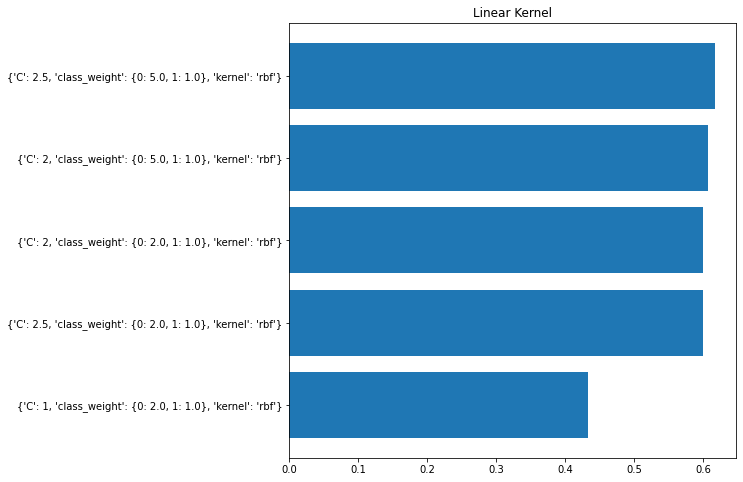

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (8,8))
temp =[]
for i,j in zip(clf.cv_results_['params'],clf.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax.barh(y_pos,x)
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.set_title("Linear Kernel")
ax.invert_yaxis()

## AdaBoost Classifier on PCA Transformed Data Using Linear Kernel

In [ ]:
parameters = {'n_estimators':(25,50,100,150),'learning_rate':(0.1,0.5,1,1.5)}
abc = AdaBoostClassifier()

clf = GridSearchCV(abc, parameters,scoring = 'precision')
clf.fit(X_transformed_l,np.array(Y).ravel())

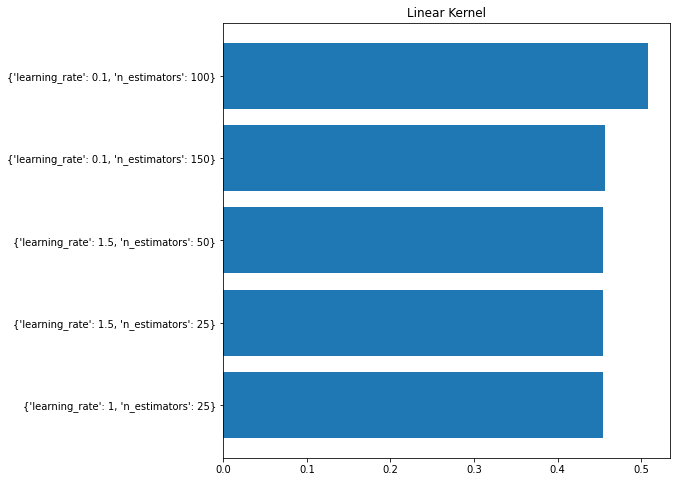

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (8,8))
temp =[]
for i,j in zip(clf.cv_results_['params'],clf.cv_results_['mean_test_score']):
  temp.append([i,j])
temp = sorted(temp,key=lambda x: x[1],reverse = True)
y = [i[0] for i in temp[:5]]
x = [i[1] for i in temp[:5]]
y_pos = np.arange(len(y))
ax.barh(y_pos,x)
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.set_title("Linear Kernel")
ax.invert_yaxis()